In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [25]:

from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters from docker-compose.yml
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'stock_data'

# Create a connection to the PostgreSQL database using psycopg2


try:
    engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    connection = engine.connect()
    print("Connection to PostgreSQL DB successful")
except Exception as e:
    print(f"Error: {e}")
finally:
    if connection:
        connection.close()

Connection to PostgreSQL DB successful


In [26]:
from sqlalchemy import create_engine, Column, Integer, String, Date, Boolean
from sqlalchemy.orm import declarative_base
from sqlalchemy.exc import SQLAlchemyError

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'stock_data'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
# # Initialize the declarative base (for SQLAlchemy ORM models)
# Base = declarative_base()

# # Define Stock Dimension Table
# class StockDimension(Base):
#     __tablename__ = 'stock_dimension'
    
#     stock_id = Column(Integer, primary_key=True)
#     stock_symbol = Column(String(10), nullable=False)
#     company_name = Column(String(255), nullable=False)
#     sector = Column(String(100))
#     currency = Column(String(10))
#     exchange = Column(String(50))

# # Define Date Dimension Table
# class DateDimension(Base):
#     __tablename__ = 'date_dimension'
    
#     date_id = Column(Integer, primary_key=True)
#     full_date = Column(Date, nullable=False)
#     day_of_week = Column(String(20))
#     month = Column(String(20))
#     quarter = Column(String(5))
#     year = Column(Integer)
#     is_holiday = Column(Boolean)

# # Define Sector Dimension Table
# class SectorDimension(Base):
#     __tablename__ = 'sector_dimension'
    
#     sector_id = Column(Integer, primary_key=True)
#     sector_name = Column(String(100), nullable=False)

# # Define Exchange Dimension Table
# class ExchangeDimension(Base):
#     __tablename__ = 'exchange_dimension'
    
#     exchange_id = Column(Integer, primary_key=True)
#     exchange_name = Column(String(100), nullable=False)
#     country = Column(String(100))

# # Function to create schema and tables
# def create_schema_and_tables():
#     try:
#         # Create a connection to the PostgreSQL database
#         engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
        
#         # Use a context manager to handle connection and transaction
#         with engine.connect() as connection:
#             print("Connection to PostgreSQL DB successful")
            
#             # Start a transaction
#             with connection.begin():
#                 # Create schema if it doesn't exist
#                 connection.execute("CREATE SCHEMA IF NOT EXISTS finance_schema;")
#                 print("Schema 'finance_schema' created successfully!")
                
#                 # Create tables in the specified schema directly
#                 Base.metadata.create_all(engine, checkfirst=True)  # checkfirst ensures tables are created only if they don't exist

#                 # Set schema for all tables
#                 for table in Base.metadata.sorted_tables:
#                     connection.execute(f'ALTER TABLE {table.name} SET SCHEMA finance_schema;')

#                 print("All dimension tables created successfully in 'finance_schema'!")

#     except SQLAlchemyError as e:
#         print(f"Error: {e}")

#     finally:
#         print("PostgreSQL connection closed")

# # Execute the function to create schema and tables
# create_schema_and_tables()


In [27]:
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
import pandas as pd

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'stock_data'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to retrieve all schemas
query_schemas = "SELECT schema_name FROM information_schema.schemata;"

# Execute the query and load the results into a DataFrame for schemas
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_schemas))
        schemas = pd.DataFrame(result.fetchall(), columns=['schema_name'])
        print("Schemas:") 
        print(schemas)
except SQLAlchemyError as e:
    print("Error while fetching schemas:", e)

# Specify the schema name to list tables
schema_name = 'finance_schema'  # Change this to your actual schema name

# Query to retrieve all tables in the specified schema
query_tables = f"""
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = '{schema_name}';
"""

# Execute the query and load the results into a DataFrame for tables
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)


Schemas:
          schema_name
0              public
1      finance_schema
2  information_schema
3          pg_catalog
4            pg_toast

Tables in schema 'finance_schema':
           table_name
0     fact_stock_data
1      date_dimension
2    sector_dimension
3  exchange_dimension
4     stock_dimension


In [28]:
# def fetch_schemas(engine):
#     query = "SELECT schema_name FROM information_schema.schemata;"
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             schemas = pd.DataFrame(result.fetchall(), columns=['finance_schema'])
#             return schemas
#     except SQLAlchemyError as e:
#         print("Error while fetching schemas:", e)
#         return None

# # Function to fetch tables in a specified schema
# def fetch_tables(engine, schema_name):
#     query = f"""
#     SELECT table_name 
#     FROM information_schema.tables 
#     WHERE table_schema = '{schema_name}';
#     """
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
#             return tables
#     except SQLAlchemyError as e:
#         print("Error while fetching tables:", e)
#         return None

# # Fetch and display schemas
# schemas = fetch_schemas(engine)
# print("Schemas:")
# print(schemas)

# # Specify the schema name to list tables
# schema_name = 'finance_schema'  # Change this to your actual schema name

# # Fetch and display tables in the specified schema
# tables = fetch_tables(engine, schema_name)
# print(f"\nTables in schema '{schema_name}':")
# print(tables)

In [29]:
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)

# Function to fetch table details
def fetch_table_details(engine, schema_name, table_name):
    query_table_details = f"""
    SELECT 
        column_name, 
        data_type, 
        character_maximum_length, 
        is_nullable,
        column_default
    FROM 
        information_schema.columns 
    WHERE 
        table_schema = '{schema_name}' 
        AND table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_table_details))
            table_details = pd.DataFrame(result.fetchall(), columns=['column_name', 'data_type', 'character_maximum_length', 'is_nullable', 'column_default'])
            return table_details
    except SQLAlchemyError as e:
        print(f"Error while fetching details for table '{table_name}':", e)
        return None

# Function to fetch foreign key relationships
def fetch_foreign_keys(engine, schema_name, table_name):
    query_foreign_keys = f"""
    SELECT 
        tc.constraint_name, 
        kcu.column_name, 
        ccu.table_name AS foreign_table_name,
        ccu.column_name AS foreign_column_name
    FROM 
        information_schema.table_constraints AS tc 
    JOIN 
        information_schema.key_column_usage AS kcu 
      ON tc.constraint_name = kcu.constraint_name
    JOIN 
        information_schema.constraint_column_usage AS ccu 
      ON ccu.constraint_name = tc.constraint_name
    WHERE 
        tc.constraint_type = 'FOREIGN KEY' 
        AND kcu.table_schema = '{schema_name}' 
        AND kcu.table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_foreign_keys))
            foreign_keys = pd.DataFrame(result.fetchall(), columns=['constraint_name', 'column_name', 'foreign_table_name', 'foreign_column_name'])
            return foreign_keys
    except SQLAlchemyError as e:
        print(f"Error while fetching foreign keys for table '{table_name}':", e)
        return None

# Fetch and display details for each table
if not tables.empty:
    for index, row in tables.iterrows():
        table_name = row['table_name']
        print(f"\nDetails for table '{table_name}':")
        
        # Fetch and print table details
        details = fetch_table_details(engine, schema_name, table_name)
        if details is not None:
            print(details)
        
        # Fetch and print foreign key relationships
        fk_relationships = fetch_foreign_keys(engine, schema_name, table_name)
        if fk_relationships is not None and not fk_relationships.empty:
            print(f"\nForeign key relationships for table '{table_name}':")
            print(fk_relationships)
        else:
            print(f"No foreign key relationships found for table '{table_name}'.")


Tables in schema 'finance_schema':
           table_name
0     fact_stock_data
1      date_dimension
2    sector_dimension
3  exchange_dimension
4     stock_dimension

Details for table 'fact_stock_data':
       column_name data_type character_maximum_length is_nullable  \
0   transaction_id   integer                     None          NO   
1         stock_id   integer                     None         YES   
2          date_id   integer                     None         YES   
3       open_price   numeric                     None         YES   
4      close_price   numeric                     None         YES   
5       high_price   numeric                     None         YES   
6        low_price   numeric                     None         YES   
7           volume   integer                     None         YES   
8              rsi   numeric                     None         YES   
9              sma   numeric                     None         YES   
10  bollinger_band   numeric       

[*********************100%***********************]  1 of 1 completed

Stock Data Head:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  114.132416   
2020-10-02  112.889999  115.370003  112.220001  113.019997  110.448204   
2020-10-05  113.910004  116.650002  113.550003  116.500000  113.849022   
2020-10-06  115.699997  116.120003  112.250000  113.160004  110.585030   
2020-10-07  114.620003  115.550003  114.129997  115.080002  112.461342   

               Volume  
Date                   
2020-10-01  116120400  
2020-10-02  144712000  
2020-10-05  106243800  
2020-10-06  161498200  
2020-10-07   96849000  

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  1005.000000  1005.000000  1005.000000  1005.000000  1005.000000   
mean    161.418289   163.168209   159.793383   161.553015   159.959454   
std      27.498641    27.596669    27.405336    27.52

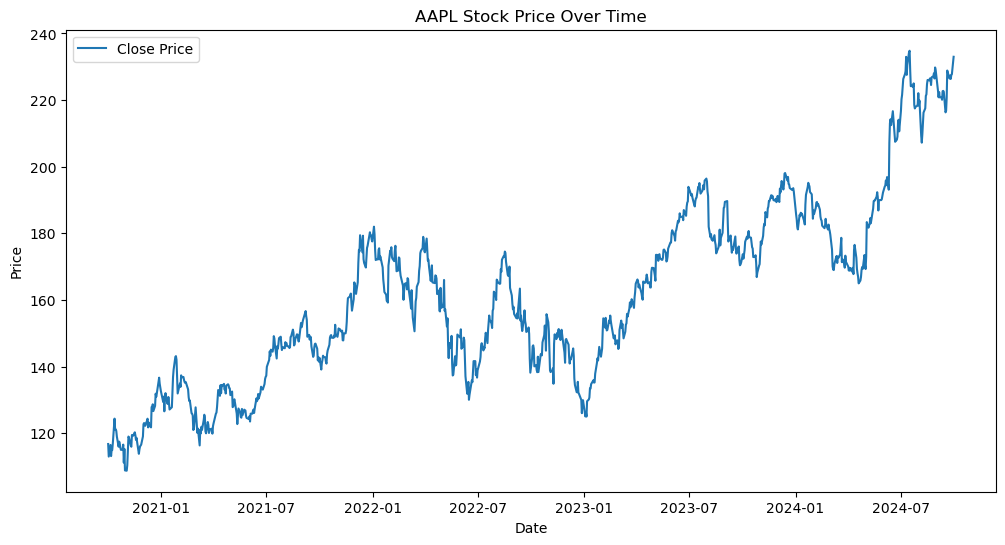

In [30]:


# Step 2: Fetch stock data
ticker_symbol = 'AAPL'  # Replace 'AAPL' with the desired ticker symbol
stock_data = yf.download(ticker_symbol, start='2020-10-01', end='2024-10-01')

# Step 3: Perform EDA
# Display the first few rows of the stock data
print("Stock Data Head:")
print(stock_data.head())

# Summary statistics
print("\nSummary Statistics:")
print(stock_data.describe())

# Visualize the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'{ticker_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# # Step 4: Save to PostgreSQL
# # Database connection parameters
# db_user = 'your_username'
# db_password = 'your_password'
# db_host = 'localhost'  # or your database host
# db_port = '5432'       # default port for PostgreSQL
# db_name = 'your_database_name'

# # Create a database engine
# engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# # Save the stock data to the database
# stock_data.to_sql('stock_data', engine, if_exists='replace', index=True)

# print("Stock data has been saved to the database.")


#ETL - Includes Data cleaning , Data transformation 

[*********************100%***********************]  1 of 1 completed

Stock Data Head:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  114.132416   
2020-10-02  112.889999  115.370003  112.220001  113.019997  110.448204   
2020-10-05  113.910004  116.650002  113.550003  116.500000  113.849022   
2020-10-06  115.699997  116.120003  112.250000  113.160004  110.585030   
2020-10-07  114.620003  115.550003  114.129997  115.080002  112.461342   

               Volume  
Date                   
2020-10-01  116120400  
2020-10-02  144712000  
2020-10-05  106243800  
2020-10-06  161498200  
2020-10-07   96849000  

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  1005.000000  1005.000000  1005.000000  1005.000000  1005.000000   
mean    161.418289   163.168209   159.793383   161.553015   159.959454   
std      27.498641    27.596669    27.405336    27.52

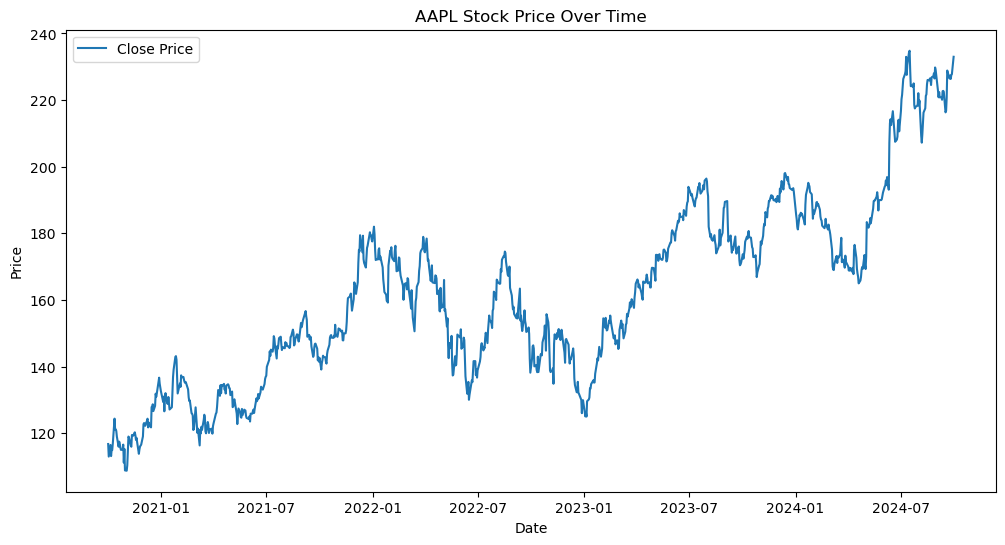

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker_symbol, start_date, end_date):
    """
    Fetch stock data for a given ticker symbol and date range.
    """
    return yf.download(ticker_symbol, start=start_date, end=end_date)

def perform_eda(stock_data):
    """
    Perform exploratory data analysis on the stock data.
    """
    # Display the first few rows of the stock data
    print("Stock Data Head:")
    print(stock_data.head())

    # Summary statistics
    print("\nSummary Statistics:")
    print(stock_data.describe())

def visualize_stock_price(stock_data, ticker_symbol):
    """
    Visualize the stock price over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    ticker_symbol = 'AAPL'  # Replace 'AAPL' with the desired ticker symbol
    start_date = '2020-10-01'
    end_date = '2024-10-01'

    # Fetch stock data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Perform EDA
    perform_eda(stock_data)

    # Visualize stock price
    visualize_stock_price(stock_data, ticker_symbol)

In [32]:
# Define variables
STOCK_SYMBOL = 'AAPL'
PERIOD = '1mo'
INTERVAL = '1d'

In [34]:
import yfinance as yf
import psycopg2
from psycopg2 import sql
# Database connection parameters

db_params = {
    'dbname': 'stock_data',
    'user': 'cosc',
    'password': 'cosc436',
    'host': 'postgres',
    'port': '5432'
}

# Function to fetch stock data
def fetch_stock_data(stock_symbol):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.info
    return {
        'stock_symbol': stock_symbol,
        'company_name': stock_info.get('shortName', ''),
        'sector': stock_info.get('sector', ''),
        'currency': stock_info.get('currency', ''),
        'exchange': stock_info.get('exchange', '')
    }




# Function to fetch historical stock prices
def fetch_historical_data(stock_symbol, start_date='2020-01-01', end_date=None):
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(start=start_date, end=end_date)
    
    # Calculate additional metrics (like RSI, SMA, Bollinger Bands)
    hist['RSI'] = calculate_rsi(hist['Close'])
    hist['SMA'] = hist['Close'].rolling(window=14).mean()
    hist['Bollinger_Upper'] = hist['SMA'] + (2 * hist['Close'].rolling(window=14).std())
    hist['Bollinger_Lower'] = hist['SMA'] - (2 * hist['Close'].rolling(window=14).std())
    
    return hist
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))



def insert_stock_data(cur, stock_data):
    insert_query = """
    INSERT INTO finance_schema.stock_dimension (stock_symbol, company_name, sector, currency, exchange) 
    VALUES (%s, %s, %s, %s, %s) 
    ON CONFLICT (stock_symbol) DO NOTHING;
    """
    cur.execute(insert_query, (
        stock_data['stock_symbol'],
        stock_data['company_name'],
        stock_data['sector'],
        stock_data['currency'],
        stock_data['exchange']
    ))


def insert_date_data(cur, historical_data):
    for date in historical_data.index:
        cur.execute("""
        INSERT INTO finance_schema.date_dimension (full_date, day_of_week, month, quarter, year, is_holiday) 
        VALUES (%s, %s, %s, %s, %s, %s) 
        ON CONFLICT (full_date) DO NOTHING;
        """, (
            date.date(),
            date.strftime('%A'),  # Day of the week
            date.strftime('%B'),  # Month
            'Q' + str((date.month - 1) // 3 + 1),  # Quarter
            date.year,
            False  # Assuming no holidays for simplicity; modify as needed
        ))


def insert_sector_and_exchange(cur, stock_data):
    # Insert sector data if it doesn't already exist
    sector_name = stock_data['sector']
    if sector_name:
        cur.execute("""
            INSERT INTO finance_schema.sector_dimension (sector_name) 
            VALUES (%s) 
            ON CONFLICT (sector_name) DO NOTHING;
        """, (sector_name,))

    # Insert exchange data if it doesn't already exist
    exchange_name = stock_data['exchange']
    if exchange_name:
        # Check if exchange already exists
        cur.execute("""
            SELECT exchange_id FROM finance_schema.exchange_dimension 
            WHERE exchange_name = %s;
        """, (exchange_name,))
        existing_exchange = cur.fetchone()

        if existing_exchange is None:  # If it doesn't exist, insert
            cur.execute("""
                INSERT INTO finance_schema.exchange_dimension (exchange_name, country) 
                VALUES (%s, %s);
            """, (exchange_name, 'USA'))




def insert_historical_data(cur, stock_id, historical_data):
    insert_query = """
    INSERT INTO finance_schema.fact_stock_data
    (stock_id, date_id, open_price, close_price, high_price, low_price, volume, rsi, sma, bollinger_band)
    VALUES (
        %s, 
        (SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s), 
        %s, %s, %s, %s, %s, %s, %s, %s
    )
    ON CONFLICT DO NOTHING;
    """

    for date, row in historical_data.iterrows():
        cur.execute(insert_query, (
            stock_id,
            date.date(),  # Use .date() to extract the date part
            row['Open'],
            row['Close'],
            row['High'],
            row['Low'],
            row['Volume'],
            row['RSI'],
            row['SMA'],
            row['Bollinger_Upper']  # You can use either the upper or lower band depending on the analysis
        ))



def main(stock_symbol='AAPL', start_date='2020-01-01', end_date='2023-10-01'):
    # Establish database connection
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Fetch stock data
    stock_data = fetch_stock_data(stock_symbol)
    print(stock_data)
    # Insert sector and exchange data
    insert_sector_and_exchange(cur, stock_data)

    # Insert stock data
    insert_stock_data(cur, stock_data)

    # Retrieve stock_id for the inserted stock
    cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
    stock_id = cur.fetchone()[0]  # Assuming the stock exists

    # Fetch historical stock price data
    historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

    # Insert date data
    insert_date_data(cur, historical_data)

    # Insert historical data
    insert_historical_data(cur, stock_id, historical_data)

    # Commit and close
    conn.commit()
    cur.close()
    conn.close()

    print(f"Inserted historical data for {stock_symbol} into the database.")

# Run the main function

main(stock_symbol='AAPL', start_date='2020-01-01', end_date='2023-10-01')


{'stock_symbol': 'AAPL', 'company_name': 'Apple Inc.', 'sector': 'Technology', 'currency': 'USD', 'exchange': 'NMS'}


InvalidColumnReference: there is no unique or exclusion constraint matching the ON CONFLICT specification


In [82]:

# caution

# uncomment the code below to clean the database
# def clean_db():
#     conn = psycopg2.connect(**db_params)
#     cursor = conn.cursor()
    
#     tables = ['stock_dimension', 'date_dimension', 'sector_dimension', 'exchange_dimension']
    
#     for table in tables:
#         delete_query = sql.SQL("DELETE FROM finance_schema.{}").format(sql.Identifier(table))
#         cursor.execute(delete_query)
    
#     conn.commit()
#     cursor.close()
#     conn.close()
#     print("Database cleaned successfully.")

# # Example usage
# clean_db()

Database cleaned successfully.
